### Problema 7.48
Um campo de velocidade é definido como $u =  2(x^2 + y^2)\ \frac{pés}{s}$, $v = (-4xy)\ \frac{pés}{s}$. Determine a função  corrente e a circulação em torno do retângulo mostrado. Desenhe as linhas de corrente para $\psi_0 = 0$, $\psi_1 =  1\  \frac{pés^{3}/s}{m}$  e $\psi_2 = 2 \frac{pés^{3}/s}{m}$. 

Hibbeler, R. C.. Mecânica dos fluidos (p. 362). Edição do Kindle. 

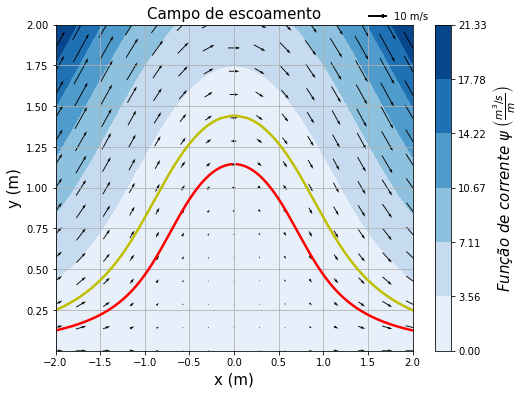

In [42]:
#==============================================================================
#Funções necessárias
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#==============================================================================
#Domínio de coordenadas
#==============================================================================
xmin=-2
xmax=2
ymin=0.00001
ymax=2

#==============================================================================
#Função para criação de malha de pontos no plano x-y
#==============================================================================
def malha(xmin, xmax, ymin, ymax, nx, ny):
    x = np.linspace(xmin, xmax, nx)    #Coordenadas x dos pontos da malha
    y = np.linspace(ymin, ymax, ny)    #Coordenadas y dos pontos da malha
    X, Y = np.meshgrid(x, y)           #Criação da malha
    return X, Y

#==============================================================================
#Função para criação da array de corrente
#==============================================================================
def func_corr(corrente):
    for i in range(np.shape(corrente)[0]):
        for j in range(np.shape(corrente)[1]):
            if corrente[i,j]<0:
                corrente[i,j]=0
            else:
                corrente[i,j]=corrente[i,j]
    return corrente

#==============================================================================
#Função para criação da array de velocidades
#==============================================================================
def func_vel(vel, fcorrente):
    for i in range(np.shape(fcorrente)[0]):
        for j in range(np.shape(fcorrente)[1]):
            if fcorrente[i,j]<0:
                vel[i,j]=0
            else:
                vel[i,j]=vel[i,j]
    return vel
#==============================================================================
#Plotagem do mapa de cores da função de corrente
#==============================================================================
X, Y = malha(xmin, xmax, ymin, ymax, 100, 100)

corrente=func_corr(2*Y*(X**2+(1/3)*Y**2))   #Função de corrente

fig = plt.figure(figsize=(8, 6))            #Tamanho da figura
ax = fig.add_subplot(111)                   #Apenas uma figura
im = ax.contourf(X, Y,                      #Plotagem da função de corrente
    corrente, cmap='Blues', levels=np.linspace(corrente.min(), corrente.max(), 7)) 
cbar=fig.colorbar(im)                       #Barra de cores
cbar.set_label(                             #Rótulo da barra de cores
    label=r'$Função\ de\ corrente\ \psi\ \left(\frac{m^{3}/s}{m}\right)$', size=15)

#==============================================================================
#Plotagem de vetores velocidade
#==============================================================================
X, Y = malha(xmin, xmax, ymin, ymax, 15, 15)
theta=np.arctan(Y/X)
r=np.sqrt(X**2+Y**2)
U=func_vel(2*(X**2+Y**2), 2*Y*(X**2+(1/3)*Y**2))
V=func_vel(-4*X*Y, 2*Y*(X**2+(1/3)*Y**2))
VR=(U**2+V**2)**0.5

velocidade=ax.quiver(X, Y,U, V, color='k', angles='xy', scale=200, width=0.0025, pivot='mid')
qk=ax.quiverkey(velocidade, 0.7, 0.9, 10, label='10 m/s', labelpos='E', coordinates='figure')

#==============================================================================
#Linha de corrente destacadas
#==============================================================================
y=np.linspace(0,1.145-0.000001,1000)
x=np.sqrt(1/(2*y)-y**2/3)
x=np.append(x,-x)
y=np.append(y,y)
plt.plot(x,y, color='r', linewidth=2.5)

y=np.linspace(0,1.442-0.000001,100)
x=np.sqrt(1/(y)-y**2/3)
x=np.append(x,-x)
y=np.append(y,y)
plt.plot(x,y, color='y', linewidth=2.5)

#==============================================================================
#Edição do gráfico
#==============================================================================
plt.title('Campo de escoamento', fontsize=15)
plt.xlabel('x (m)', fontsize=15)
plt.ylabel('y (m)', fontsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()
